In [14]:
from iminuit import Minuit
import numpy as np
import math
from math import*
%matplotlib inline
from matplotlib import pyplot as plt

In [15]:
def nll1(a0,b):
    data = np.loadtxt('/home/user/work/SINP_2023/hepap-saha/cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    n2 = (data[:,1])
    r1 = len(n2)
    n=[]
    f=0
    for i in range(r1):
       n.append(floor(n2[i]))
    for i in range(r1): 
        if(x[i]<120 or x[i]>130):
          f_i = (a0*math.e**(-b*x[i]) + b*n[i]*x[i] - n[i]*math.log(a0) + n[i]*math.log(n[i]) - n[i])
          f = f + f_i
    return f

In [16]:
m = Minuit(nll1,a0=56000,b=0.03)
m.limits["a0"]=(50000,100000)
m.migrad()  # find minimum
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 22.82                      │              Nfcn = 153              │
│ EDM = 1.88e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a0   │   56e3    │    5e3    │            │            │  50000  │ 100000  │       │
│ 1 │ b    │  34.4e-3  │  0.7e-3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────┐
│    │        a0         b │
├────┼─────────────────────┤
│ a0 │  2.12e+07 3.0610813 │
│  b │ 3.0610813  4.49e-07 │
└────┴─────────────────────┘

In [17]:
a0_fit = m.values["a0"]
b_fit = m.values["b"]
print(a0_fit,b_fit)

55530.69677674181 0.03438617322176677


[105.68236329 107.15852501 108.72931513 110.20382034 111.58431833
 113.15759322 114.62754301 116.10722482 117.58214415 119.15417666
 120.62951012 122.10898487 123.5868031  125.06544959 126.53995479
 128.11281556 129.58877021 131.0645178  132.5425431  134.02263904
 135.59674219 137.07580281 138.54678791 140.02709092 141.50449502
 142.98044967 144.55807292 146.03547702 147.51122461 148.99111349
 150.56728728 152.04531258 153.52313081 154.90197229]


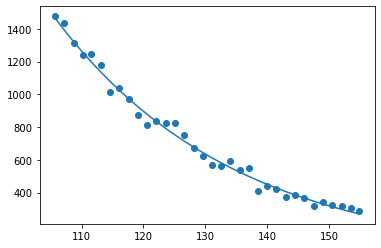

In [18]:
data = np.loadtxt('/home/user/work/SINP_2023/hepap-saha/cms_mass_events_2012_data_w.txt')
x = (data[:,0])
n2 = (data[:,1])
r = len(x)
y = []
print(x)
def f(t):
    return(a0_fit*exp(-b_fit*t))
for i in range(r):
    y.append(f(x[i]))
plt.plot(x,y)
plt.scatter(x,n2)
plt.savefig('fit-bkgd-exp-cms-calib-binned-2.png')

In [19]:
def nll2(a0,b,a1):
    data = np.loadtxt('/home/user/work/SINP_2023/hepap-saha/cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    n2 = (data[:,1])
    r1 = len(n2)
    n=[]
    f=0
    mu = 125.3
    a=2
    for i in range(r1):
       n.append(floor(n2[i]))
    for i in range(r1): 
        f = f + ((a0*math.e**(-b*x[i]) + (a1*math.e**(-(x[i] - mu)**2/a**2))) - n[i]*math.log(a0*math.e**(-b*x[i]) + (a1*math.e**(-(x[i] - mu)**2/a**2))) + n[i]*math.log(n[i]) - n[i])
    return f

In [20]:
m = Minuit(nll2,a0=50000,b=0.03,a1=70)
m.limits["a1"]=(10,1000)
m.limits["a0"]=(0,100000)
m.migrad()  # find minimum
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 25.66                      │              Nfcn = 142              │
│ EDM = 3.29e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a0   │   55e3    │    5e3    │            │            │    0    │ 100000  │       │
│ 1 │ b    │  34.4e-3  │  0.7e-3   │            │            │         │         │       │
│ 2 │ a1   │    68     │    32     │            │            │   10    │  1000   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────┐
│    │        a0         b        a1 │
├────┼───────────────────────────────┤
│ a0 │  2.11e+07 3.0576366     1.7e3 │
│  b │ 3.0576366  4.49e-07 1.0433e-3 │
│ a1 │     1.7e3 1.0433e-3  1.05e+03 │
└────┴───────────────────────────────┘

In [21]:
a0_fit = m.values["a0"]
b_fit = m.values["b"]
a1_fit = m.values["a1"]
print(a0_fit,b_fit,a1_fit)

55362.35952438447 0.03440202146823393 68.3899808438227


[105.68236329 107.15852501 108.72931513 110.20382034 111.58431833
 113.15759322 114.62754301 116.10722482 117.58214415 119.15417666
 120.62951012 122.10898487 123.5868031  125.06544959 126.53995479
 128.11281556 129.58877021 131.0645178  132.5425431  134.02263904
 135.59674219 137.07580281 138.54678791 140.02709092 141.50449502
 142.98044967 144.55807292 146.03547702 147.51122461 148.99111349
 150.56728728 152.04531258 153.52313081 154.90197229]


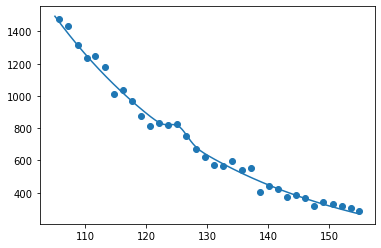

In [22]:
data = np.loadtxt('/home/user/work/SINP_2023/hepap-saha/cms_mass_events_2012_data_w.txt')
x = (data[:,0])
n2 = (data[:,1])
r = len(x)
y = []
print(x)
mu = 125.3
a = 2
x1 = np.arange(105,155,0.1)
def f(t):
    return(a0_fit*exp(-b_fit*t) + a1_fit*exp(-(t - mu)**2/a**2))
for i in x1:
    y.append(f(i))    
plt.plot(x1,y)
plt.scatter(x,n2)

In [23]:
#=====================================================================================================================================
#required functions:
def f1(t): #fit func: a0_fit*exp(-b*x) + a1_fit*exp{-(x-mu_fit)**2/a_fit**2}, fit values obtained from fitting data with fit func.
    a0_fit = 55373.03278340583 
    b_fit = 0.03440360969646695
    a1_fit = 68.47016166890789
    mu_fit = 125.3
    a_fit = 2
    return a0_fit*math.e**(-b_fit*t) + a1_fit*math.e**(-(t - mu_fit)**2/a_fit**2)
def f2(t): #fit func: a0_fit*exp(-b*x), fit values obtained from fitting data with fit func.
    a0_fit = 55813.98970627137
    b_fit = 0.034524928040258404
    return a0_fit*math.e**(-b_fit*t)
#=======================================================================================================================================
#functions to create and store toy datasets:    
def num1(): #create toy data by introducing Poisson fluctuation in the bkgd fit model
    data = np.loadtxt('cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    r = len(x)
    y=[]
    for i in range(r):
        y.append(f2(x[i]))
    n = np.random.poisson(lam=(y), size=(34)) 
    print("num1",n)
    print("num1",x)
    np.savetxt('toy_data_bkg_local_f.txt',n)
    #print(n)
    return n
def num2(): #store the toy data
    n=[]
    dat = np.loadtxt('toy_data_bkg_local_f.txt')
    for i in dat:
        n.append(i)
    return n
def num3(): #create toy data by introducing Poisson fluctuation in the data fit model
    data = np.loadtxt('cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    r = len(x)
    y=[]
    for i in range(r):
        y.append(f1(x[i]))
    n = np.random.poisson(lam=(y), size=(34))
    np.savetxt('toy_data_sig_local_f.txt',n)
    return n
def num4(): #store the toy data
    n=[]
    dat = np.loadtxt('toy_data_sig_local_f.txt')
    for i in dat:
        n.append(i)
    #print(n)  
    return n         
#==============================================================================================================    
#neg-log-likelihood functions:
def fact(n):
    f=1
    for i in range(1,n+1):
        f = f*i
    return f    
    
def nll1(a0,b): #neg-log-likelihood func for toy data generated from bkgd only fit with and exp
    data = np.loadtxt('cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    r = len(x)
    n = num2() 
    f=0       
    for i in range(r): 
        f_i = a0*math.e**(-b*x[i])
        n_i = math.floor(n[i])
        if(f_i<=0):
           print("f_i",f_i)
        f = f + (f_i - n[i]*math.log(f_i) + n_i*math.log(n_i) - n_i)
    return f

def nll2(a0,b,a1): #neg-log-likelihood func for toy data generated from bkgd only fit with an exp+gauss
    data = np.loadtxt('cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    r = len(x)
    n = num2()    
    f=0     
    mu = 125.3
    a = 2
    #i>14 to i<=24 sig-reg
    for i in range(r): 
           n_i = math.floor(n[i])
           f_i = a0*math.e**(-b*x[i]) + a1*math.e**(-(x[i] - mu)**2/a**2)
           if(f_i<=0):
              print("f_i",f_i)
           f = f + (f_i - n[i]*math.log(f_i) + n_i*math.log(n_i) - n_i)
    return f

def nll5(a0,b): #neg-log-likelihood func for toy data generated from bkgd+sig fit with an exp
    data = np.loadtxt('cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    r = len(x)
    r1 = len(x)
    n = num4() 
    f=0       
    for i in range(r): 
        f_i = a0*math.e**(-b*x[i])
        n_i = math.floor(n[i])
        if(f_i<=0):
          print("f_i",f_i)
        f = f + (f_i - n[i]*math.log(f_i) + n_i*math.log(n_i) - n_i)
    return f

def nll6(a0,b,a1): #neg-log-likelihood func for toy data generated from bkgd+sig fit with an exp+gauss
    data = np.loadtxt('cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    r = len(x)
    n = num4()    
    f=0     
    mu = 125.3
    a = 2
    for i in range(r):
           n_i = math.floor(n[i])
           f_i = a0*math.e**(-b*x[i]) + a1*math.e**(-(x[i] - mu)**2/a**2)
           if(f_i<=0):
              print("f_i",f_i)
           f = f + (f_i - n[i]*math.log(f_i) + n_i*math.log(n_i) - n_i)
    return f

def nll3(n,a0,b): #calculates neg-log-likelihood and chisq for exp fit
    lchi=[]
    chisq=0
    data = np.loadtxt('cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    r = len(x) 
    f=0       
    #i>14 to i<=24 sig-reg
    #print(n)
    for i in range(r): 
           n_i = math.floor(n[i])
           f_i = a0*math.e**(-b*x[i])
           chisq_i = (f_i - n[i])**2/(f_i)
           chisq += chisq_i
           f = f + (f_i - n[i]*math.log(f_i) + n_i*math.log(n_i) - n_i)
    lchi.append(f)
    lchi.append(chisq)       
    return lchi

def nll4(n,a0,b,a1): #calculates neg-log-likelihood and chisq for exp+gauss fit
    lchi=[]
    chisq=0
    data = np.loadtxt('cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    r = len(x) 
    f=0     
    mu = 125.3
    a = 2
    #i>14 to i<=24 sig-reg
    for i in range(r): 
           n_i = math.floor(n[i])
           f_i = a0*math.e**(-b*x[i]) + a1*math.e**(-(x[i] - mu)**2/a**2)
           f = f + (f_i - n[i]*math.log(f_i) + n_i*math.log(n_i) - n_i)
           chisq_i = (f_i - n[i])**2/(f_i)
           chisq += chisq_i
    lchi.append(f)
    lchi.append(chisq)       
    return lchi

In [ ]:
llrb=[]
chi1=[]
chi2=[]
fit_a0_exp=[]
fit_b_exp=[]
neg_like_exp=[]
fit_a0_gxp=[]
fit_b_gxp=[]
fit_a1=[]
neg_like_gxp=[]
nll_diff=[]
a1_neg=[]
like_ratio=[]
k_exp=0
ka_exp=0
k_gxp=0
ka_gxp=0
neg_a1=0
pos_a1=0
neg_nll=0
k=0
for i in range(10000000):
    gxp_valid = False
    gxp_acc = False
    n=num1()  #put num1() for bkgd, num3() for full data
    m=Minuit(nll1,a0=50000,b=0.02) #use nll1 for bkgd, nll5 for full data
    m.limits["a0"] = (0,100000)
    m.limits["b"] = (0,1)
    m.migrad()
    m.hesse()
    print('exp-valid-acc',m.valid,m.accurate)
    if(m.valid):#checks whether a valid minimum is reached
      k_exp=k_exp+1    
    if(m.accurate):#checks whether hesse is accurate
       ka_exp=ka_exp+1
    a0_fit_exp = m.values["a0"]
    b_fit_exp = m.values["b"]
    print("exp-fit",a0_fit_exp,b_fit_exp)
    
    
    m=Minuit(nll2,a0=50000,b=0.03,a1=50)  #use nll2 for bkgd, nll6 for full data
    m.limits["a0"] = (0,100000)
    m.limits["a1"] = (0,1000)
    m.limits["b"] = (0,1)
    m.migrad()
    m.hesse()
    print('gxp-valid-acc',m.valid,m.accurate)
    if(m.valid):
      k_gxp=k_gxp+1   
      gxp_valid = True 
    if(m.accurate):
       ka_gxp=ka_gxp+1
       gxp_acc = True
    a0_fit_gxp = m.values["a0"]
    b_fit_gxp = m.values["b"]
    a1_fit_gxp = m.values["a1"]
    print("exp-gauss-fit",a0_fit_gxp,b_fit_gxp,a1_fit_gxp)  
    
    if (gxp_valid*gxp_acc):
       k=k+1
       
       lchi1 = nll3(n,a0_fit_exp,b_fit_exp)
       nl1 = lchi1[0]
       chi1.append(lchi1[1]) 
       fit_a0_exp.append(a0_fit_exp)
       fit_b_exp.append(b_fit_exp)
       neg_like_exp.append(nl1)
       
       lchi2 = nll4(n,a0_fit_gxp,b_fit_gxp,a1_fit_gxp)
       nl2 = lchi2[0]
       chi2.append(lchi2[1]) 
       fit_a0_gxp.append(a0_fit_gxp)
       fit_b_gxp.append(b_fit_gxp)
       fit_a1.append(a1_fit_gxp)
       neg_like_gxp.append(nl2)
       nll_diff.append(2*(nl1-nl2))
       
       llrb.append(2*(nl1-nl2))
       
       if ((a1_fit_gxp)<0.001):
          neg_a1 = neg_a1+1
       if ((nl1-nl2)<0):
          neg_nll = neg_nll+1
          print(nl1-nl2,math.e**(nl2-nl1),a1_fit_gxp)
          like_ratio.append(math.e**(nl2-nl1))
          a1_neg.append(a1_fit_gxp)
       
       #print("iteration ", i, "neg log-like exp ", nl1, "  neg log-like exp+gauss ", nl2, "  neg log ratio, exp/exp+gauss ", llrb[k-1])
       
    if (k>=1000):
       break   
      
np.savetxt("nll-ratio-10K-stir-bkg-cms_2012_calib_2.txt",llrb)
np.savetxt("chisq-exp-10K-stir-bkg-cms_2012_calib_2.txt",chi1)
np.savetxt("chisq-gxp-10K-stir-bkg-cms_2012_calib_2.txt",chi2)

/tmp/ipykernel_5040/1785904252.py:16: RuntimeWarning: divide by zero encountered in divide
  return math.e**(-((t)/2))/(2*(t)**0.5*sqrt(2*math.pi))


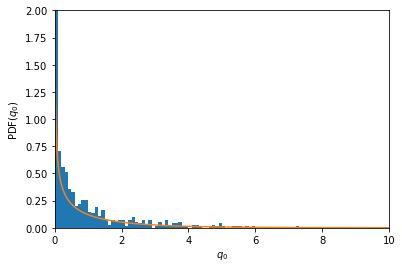

In [11]:
d1=np.loadtxt("nll-ratio-10K-stir-bkg-cms_2012_calib_2.txt")
d2=np.loadtxt("nll-ratio-10K-stir-full-cms_2012_calib_2.txt")
n1=[]
n2=[]
for i in d1:
    n1.append(i) 
for i in d2:
    n2.append(i)

plt.xlim(0,10)
plt.ylim(0,2)
plt.xlabel("$q_{0}$")
plt.ylabel("PDF($q_{0}$)")
x3 = np.arange(0, 10.2, 0.01)
def f(t):
    return math.e**(-((t)/2))/(2*(t)**0.5*sqrt(2*math.pi))
plt.hist(n1, bins=100, range=(0,10), density = True)
x3 = np.arange(0, 10, 0.01)
plt.plot(x3,f(x3))
plt.savefig('llr-bkg-cms-calib-binned.png')

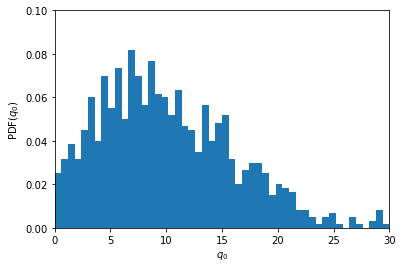

In [12]:
plt.xlim(0,30)
plt.ylim(0,0.1)
plt.xlabel("$q_{0}$")
plt.ylabel("PDF($q_{0}$)")
x3 = np.arange(0, 10.2, 0.01)
def f(t):
    return math.e**(-((t)/2))/(2*(t)**0.5*sqrt(2*math.pi))
plt.hist(n2, bins=100, range=(0,60), density = True)
plt.savefig('llr-full-cms-calib-binned.png')

In [13]:
import statistics
m = statistics.mean(n2)
print(sqrt(m))

3.2029803582269976


In [180]:
data = np.loadtxt('cms-mass-event-bkgd-binned.dat')
x1=data[:,0]
y1=data[:,1]
data2 = np.loadtxt('cms-mass-event-data-binned.dat')
x2=data2[:,0]
y2=data2[:,1]

In [181]:
import pandas as pd
dat = {'b_mass': x1,'b_evnt': y1, 'd_mass': x2, 'd_evnt':y2, 'd_evnt-b_evnt':y2-y1}
df=pd.DataFrame(dat)
print(df)

        b_mass       b_evnt      d_mass       d_evnt  d_evnt-b_evnt
0   114.559326  1622.899207  114.475294  1629.285714       6.386508
1   115.961077  1535.709564  116.000000  1550.181513      14.471949
2   117.447430  1450.703065  117.524706  1462.505882      11.802817
3   118.933581  1369.982185  119.007059  1381.253782      11.271596
4   120.504134  1295.730068  120.701176  1304.312605       8.582537
5   121.989782  1225.723233  122.014118  1257.326050      31.602817
6   123.432371  1170.695895  123.496471  1225.359664      54.663769
7   124.917414  1113.545915  125.021176  1206.255462      92.709547
8   126.572066  1052.190987  126.503529  1105.717647      53.526660
9   127.971799  1007.857527  128.028235  1030.899160      23.041633
10  129.456640   954.993165  129.510588   964.647059       9.653893
11  130.983631   906.434590  131.162353   898.415126      -8.019464
12  132.510017   870.732869  132.517647   866.433613      -4.299255
13  133.994454   826.439744  134.000000   825.89